<a href="https://colab.research.google.com/github/rferina/ml_foundations_coursework/blob/main/Rachel_Ferina_HW02_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: ROC Curves

In this assignment you will code a small program to plot an ROC curve similar to Sklearn RocCurveDisplay.

* Create a new class named *MyRocCurve*
* The constructor will receive 4 parameters:
  1. *data* - The dataset (DataFrame)
  2. *feature* - The name of the feature to use for classification (string)
  3. *label* - The name of the label feature (string)
  4. *num_thresholds* - The number of threshold values to use for the ROC curve (int, optional, default = 10)

* Code a class method called *compute_tpr_fpr* that computes the TPR and FPR values for different thresholds.
  * Create the specified number of thresholds equally spaced between the feature's min and max values (Hint: explore numpy's *linspace* function)
  * Follow the steps in the **Threshold Classifier** section of Lab 2 to compute the TPR and FPR values for each threshold
  * Store the TPR and FPR values as lists and make these accesible as object attributes *self.tpr* and *self.fpr*

* Code a class method called *plot_roc* that uses the TPR and FPR lists to plot the ROC curve using your preferred visualization library (Matplotlib, Seaborn, etc.)

* The constructor should innitialize all object attributes and populate the tpr and fpr attributes by calling the *compute_tpr_fpr* method

* **IMPORTANT NOTE:** ROC curves only really make sense for non-categorical features so focus your experiments on the numerical features of the dataset. Remember that just because categorical features are encoded as numbers, it does not mean they become numerical features.

In [ ]:
import os
from google.colab import drive


mount_point = '/content/drive'
drive.mount(mount_point, force_remount=True)

drive_dir = os.path.join(mount_point, "MyDrive")
drive_dir

%cd $drive_dir/hmwk2
%pwd

Mounted at /content/drive
/content/drive/MyDrive/hmwk2


'/content/drive/MyDrive/hmwk2'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# IMPORTANT NOTE: these might be different for you
dataset_dir = "hmwk2"
dataset_file = "cardio_train.csv"
cardio_df = pd.read_csv(os.path.join(drive_dir, dataset_dir, dataset_file))

cardio_df.columns

# drop id column as its not useful for the model to learn from
cardio_df.drop("id", axis=1, inplace=True)
cardio_df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
#Include your code here
class MyRocCurve:
  def __init__(self, data, feature, label, num_thresholds=10):
    '''Initializes the dataframe, features and labels of the data (as strings), and the number of thresholds for the ROC curve.
    Calls the compute_tpr_fpr method to populate true positive and false positive rate lists.'''
    self.data = data
    self.feature = feature
    self.label = label
    self.num_thresholds = num_thresholds
    self.tpr, self.fpr = self.compute_tpr_fpr()

  def compute_tpr_fpr(self):
    '''After computing them for different thresholds, returns the true positive and false positive rates as lists.'''
    # initialize tpr and fpr lists
    self.tpr = []
    self.fpr = []
    # determine thresholds by evenly spacing the number of thresholds between the minimum and maximum features
    thresolds = np.linspace(self.data[self.feature].min(), self.data[self.feature].max(), num=self.num_thresholds, dtype='int64')
    # iterate through the thresholds
    for thresh in thresolds:
      # Add a new prediction column in the dataframe
      self.data['Prediction'] = 0
      # add predictions on the feature to new prediction column
      predicted = self.data[self.feature] > thresh
      self.data.loc[predicted,'Prediction'] = 1.
      # define labels and predictions
      labels = self.data[self.label]
      predictions = self.data.Prediction
      # make confusion matrix, calculate stats
      cf_mat = confusion_matrix(labels, predictions)
      tn = cf_mat[0][0]
      fp = cf_mat[0][1]
      fn = cf_mat[1][0]
      tp = cf_mat[1][1]
      total_p = tp + fn
      total_n = tn + fp
      # add tpr and fpr to respective lists
      self.tpr.append(tp / total_p)
      self.fpr.append(fp / total_n)
    return self.tpr, self.fpr

  def plot_roc(self):
    '''Plots an ROC curve based on the true and false positive rates.'''
    # graph ROC curve
    plt.plot(self.fpr, self.tpr, marker="o")
    plt.plot([0, 1], [0, 1], linestyle='dashed')
    plt.title(str(self.feature) + ' ROC Curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid()
    plt.show()


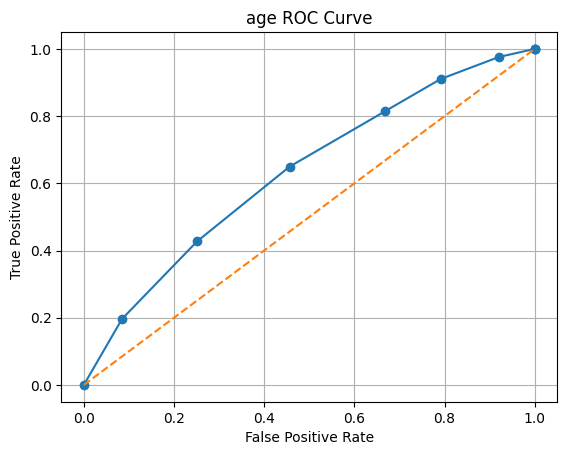

In [ ]:

age_roc_curve = MyRocCurve(cardio_df, "age", "cardio")
tpr_age, fpr_age = age_roc_curve.compute_tpr_fpr()
age_roc_curve.plot_roc()

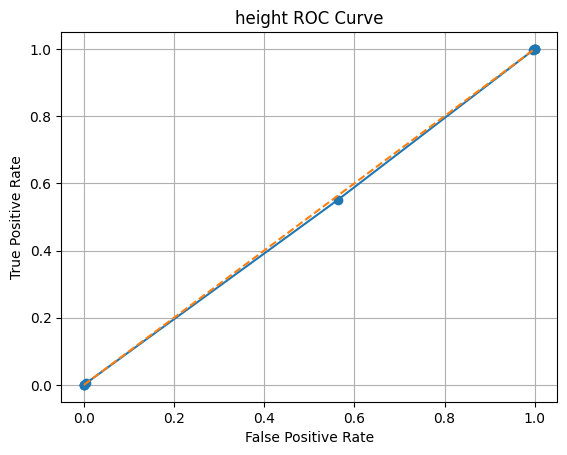

In [ ]:
height_roc_curve = MyRocCurve(cardio_df, "height", "cardio")
tpr_height, fpr_height = height_roc_curve.compute_tpr_fpr()
height_roc_curve.plot_roc()

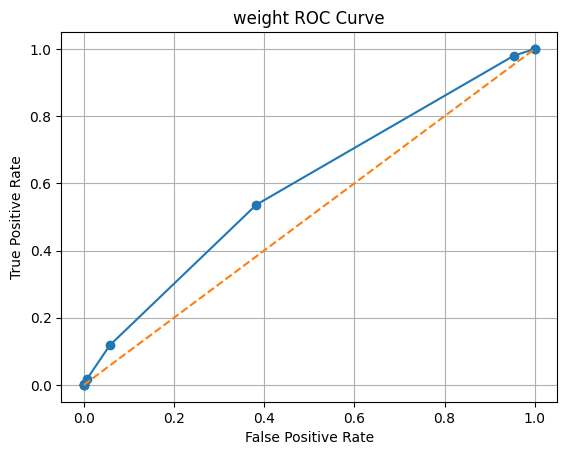

In [ ]:
weight_roc_curve = MyRocCurve(cardio_df, "weight", "cardio")
tpr_weight, fpr_weight = weight_roc_curve.compute_tpr_fpr()
weight_roc_curve.plot_roc()

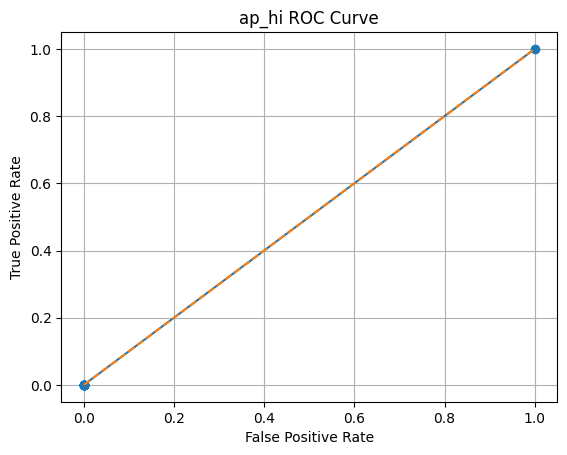

In [ ]:
ap_hi_roc_curve = MyRocCurve(cardio_df, "ap_hi", "cardio")
tpr_ap_hi, fpr_ap_hi = ap_hi_roc_curve.compute_tpr_fpr()
ap_hi_roc_curve.plot_roc()

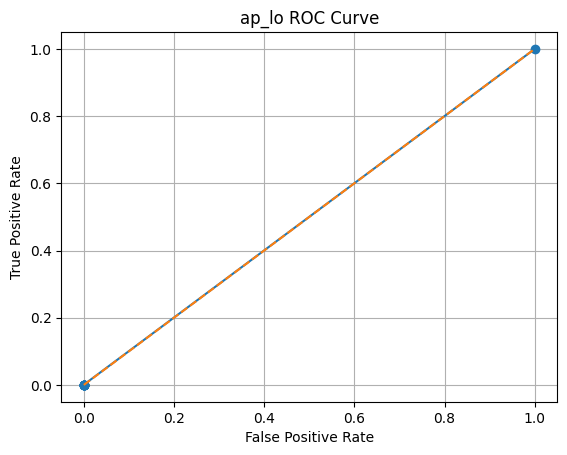

In [ ]:
ap_lo_roc_curve = MyRocCurve(cardio_df, "ap_lo", "cardio")
tpr_ap_lo, fpr_ap_lo = ap_lo_roc_curve.compute_tpr_fpr()
ap_lo_roc_curve.plot_roc()

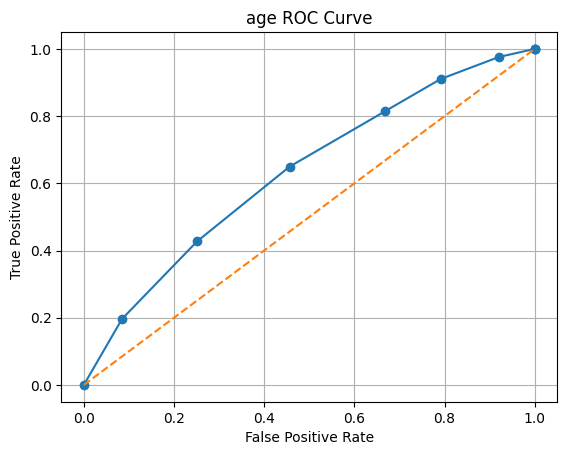

In [ ]:
#Usage example
age_roc = MyRocCurve(cardio_df, "age", "cardio")
age_roc.plot_roc()

Once finished, use your MyRocCurve class to determine which feature from the 'cardio' dataset does best at predicting the label

Make use of the following *compute_auc* function to compute the Area Under the Curve score from the TPR, FPR for each feature.

In [ ]:
def compute_auc(tpr, fpr):
  """
  Args
    tpr - float list e.g. [0, .2, .4, .6, .6, .6, .8, .8, 1., 1., 1.]
    fpr - float list e.g. [0., 0., 0., 0.,.2, .4, .4, .6, .6, .8, 1.]

  Returns
    auc - Area Under the Curve score (float)
  """
  idx = 0
  auc = 0
  while idx < len(tpr) - 1:
    rect_base = fpr[idx + 1] - fpr[idx]
    rect_height = tpr[idx]
    rect_area = rect_base * rect_height

    tri_base = rect_base
    tri_height = tpr[idx + 1] - tpr[idx]
    tri_area = (tri_base * tri_height) / 2

    auc += rect_area + tri_area
    idx += 1

  auc = abs(auc) #just to account for reversing the predictions
  if auc < 0.5:
    auc = 1 - auc

  return auc

#Resting the auc function
tpr = [0, .2, .4, .6, .6, .6, .8, .8, 1., 1., 1.]
fpr = [0., 0., 0., 0.,.2, .4, .4, .6, .6, .8, 1.]
print(f"AUC = {compute_auc(tpr, fpr)}")

AUC = 0.8


In [ ]:
#Include your code here
age_auc = compute_auc(tpr_age, fpr_age)
print('Age AUC:', age_auc)
height_auc = compute_auc(tpr_height, fpr_height)
print('Height AUC:', height_auc)
weight_auc = compute_auc(tpr_weight, fpr_weight)
print('Weight AUC:', weight_auc)
ap_hi_auc = compute_auc(tpr_ap_hi, fpr_ap_hi)
print('Systolic Blood Pressure AUC:', ap_hi_auc)
ap_lo_auc = compute_auc(tpr_ap_lo, fpr_ap_lo)
print('Diastolic Blood Pressure AUC:', ap_lo_auc)

#Remember to mention which feature performed best


Age AUC: 0.6323483166249858
Height AUC: 0.506242440206462
Weight AUC: 0.5885728229066244
Systolic Blood Pressure AUC: 0.5000715049237009
Diastolic Blood Pressure AUC: 0.5003146646030752


Age is the best feature for predicting cardiovascular disease, as it had the highest AUC at 0.63. An AUC closer to 1 is considered to indicate good model performance. However, 0.63 is not much higher than 0.5 (no class discrimination),  indicating moderate performance.